# 🎓 Capstone Project - Advanced Machine Learning
## TEC-VIII Programa de Especialización en Big Data Analytics aplicada a los Negocios

---

### 📋 Información del Proyecto

| Campo | Información |
|-------|-------------|
| **Nombre del Estudiante** | [Completar] |
| **Título del Proyecto** | [Completar] |
| **Fecha de Entrega** | [Completar] |
| **Profesor** | [Completar] |

---

## 📑 Índice

1. [Resumen Ejecutivo](#1-resumen-ejecutivo)
2. [Configuración del Entorno](#2-configuración-del-entorno)
3. [Definición del Problema de Negocio](#3-definición-del-problema-de-negocio)
4. [Carga y Exploración de Datos](#4-carga-y-exploración-de-datos)
5. [Preprocesamiento de Datos](#5-preprocesamiento-de-datos)
6. [Diseño y Arquitectura del Modelo](#6-diseño-y-arquitectura-del-modelo)
7. [Entrenamiento del Modelo](#7-entrenamiento-del-modelo)
8. [Evaluación y Métricas](#8-evaluación-y-métricas)
9. [Interpretación de Resultados](#9-interpretación-de-resultados)
10. [Conclusiones y Recomendaciones de Negocio](#10-conclusiones-y-recomendaciones-de-negocio)
11. [Referencias](#11-referencias)

---
## 1. Resumen Ejecutivo

**Instrucciones:** Proporcione un resumen conciso (máximo 300 palabras) que incluya:
- Problema de negocio abordado
- Metodología utilizada
- Principales hallazgos
- Impacto esperado en el negocio

---

*[Escriba su resumen ejecutivo aquí]*





---

## 2. Configuración del Entorno

### 2.1 Verificación de GPU (Recomendado para Deep Learning)

In [1]:
# Verificar si hay GPU disponible
import torch

# Verificar disponibilidad de GPU
if torch.cuda.is_available():
    print(f"✅ GPU disponible: {torch.cuda.get_device_name(0)}")
    print(f"   Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    device = torch.device('cuda')
else:
    print("⚠️ GPU no disponible. Usando CPU.")
    print("   Recomendación: En Colab, vaya a Runtime > Change runtime type > GPU")
    device = torch.device('cpu')

print(f"\nDispositivo seleccionado: {device}")

✅ GPU disponible: Tesla T4
   Memoria GPU: 15.64 GB

Dispositivo seleccionado: cuda


### 2.2 Instalación de Librerías Adicionales (si es necesario)

In [2]:
# Descomente e instale las librerías adicionales que necesite
# !pip install transformers
# !pip install pytorch-lightning
# !pip install optuna
# !pip install shap
# !pip install lime

### 2.3 Importación de Librerías

In [3]:
# =====================================================
# LIBRERÍAS FUNDAMENTALES
# =====================================================

# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Deep Learning - TensorFlow/Keras (alternativa)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score)

# Utilidades
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("✅ Todas las librerías importadas correctamente")
print(f"   PyTorch version: {torch.__version__}")
print(f"   TensorFlow version: {tf.__version__}")

✅ Todas las librerías importadas correctamente
   PyTorch version: 2.9.0+cu128
   TensorFlow version: 2.19.0


### 2.4 Conexión con Google Drive (para cargar datos)

In [4]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base de su proyecto
# Modifique esta ruta según la ubicación de sus datos
BASE_PATH = '/content/drive/MyDrive/DATASETS/dataset_faenvipe_sim.csv'

print(f"✅ Google Drive montado")
print(f"   Ruta base del proyecto: {BASE_PATH}")

Mounted at /content/drive
✅ Google Drive montado
   Ruta base del proyecto: /content/drive/MyDrive/DATASETS/dataset_faenvipe_sim.csv


---
## 3. Definición del Problema de Negocio

### 3.1 Contexto del Negocio

**Instrucciones:** Describa el contexto empresarial, incluyendo:
- Industria/Sector
- Empresa o caso de estudio
- Situación actual

---

Industria/Sector: Manufactura de envases de vidrio para los rubros alimenticio, farmacéutico y de bebidas.


Empresa o caso de estudio: Fábrica de Envases Vidrios del Perú (FAENVIPE).


Situación actual: La inspección de defectos (burbujas, fisuras o impurezas) se realiza de forma manual en la línea de producción. La empresa maneja diversos productos como botellas de cerveza, frascos de mermelada y jarabes, en colores ámbar, transparente y verde



---

### 3.2 Problema a Resolver

**Instrucciones:** Defina claramente:
- ¿Cuál es el problema específico?
- ¿Por qué es importante resolverlo?
- ¿Cuál es el impacto actual del problema?

---

¿Cuál es el problema específico?: Ineficiencia en la detección de defectos debido a la subjetividad y fatiga del ojo humano en procesos manuales.


¿Por qué es importante resolverlo?: Para garantizar la seguridad del consumidor (evitando microfisuras que comprometan la resistencia) y mejorar la eficiencia operativa.


¿Cuál es el impacto actual del problema?: Se generan altas tasas de mermas por productos rechazados tardíamente y existe un riesgo latente de devoluciones masivas si los defectos llegan al cliente final.



---

### 3.3 Objetivos del Proyecto

**Instrucciones:** Liste los objetivos SMART (Específicos, Medibles, Alcanzables, Relevantes, Temporales)

---

**Objetivo General:**
Implementar un modelo de Machine Learning para automatizar la clasificación de calidad de los envases de vidrio en FAENVIPE.

**Objetivos Específicos:**

1. Reducir el porcentaje de mermas en la producción en un 15% durante el primer semestre de operación.

2. Clasificar los envases en las categorías "Apto" o "Defectuoso" con una precisión que minimice el descarte innecesario de productos conformes.

3. Identificar y tipificar defectos específicos (burbujas, grietas o manchas) para analizar su correlación con variables de proceso como la temperatura del horno y la velocidad de la cinta.

---

### 3.4 Tipo de Problema de Machine Learning

**Instrucciones:** Identifique el tipo de problema:
- [ ] Clasificación binaria
- [x] Clasificación multiclase
- [ ] Regresión
- [ ] Clustering
- [ ] Series temporales
- [ ] Procesamiento de Lenguaje Natural (NLP)
- [ ] Visión por Computadora
- [ ] Otro: _________

**Justificación:**
El problema se aborda como Clasificación porque el objetivo es asignar etiquetas discretas (el tipo de defecto) a partir de variables numéricas y categóricas de producción. Aunque el proceso físico involucra inspección visual, para fines de este modelo estamos utilizando datos de sensores de temperatura y velocidad que actúan como predictores del estado del envase.

---

---
## 4. Carga y Exploración de Datos

### 4.1 Carga de Datos

In [6]:
# =====================================================
# CARGA DE DATOS
# =====================================================

# Opción 1: Cargar desde Google Drive
# df = pd.read_csv(BASE_PATH + 'datos.csv')

# Opción 2: Cargar desde URL
# df = pd.read_csv('https://url-de-sus-datos.com/datos.csv')

# Opción 3: Cargar desde archivo local (subido a Colab)
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('nombre_archivo.csv')

# Opción 4: Dataset de ejemplo (para testing)
# from sklearn.datasets import load_iris, load_boston, fetch_california_housing
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# =====================================================
# COMPLETE AQUÍ: Cargue su dataset
# =====================================================

file_id = '1vu4x5CXfLXSWwaDXbOU6rvk4aD62s1e6'
direct_link = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(direct_link)  # Descomente y complete

print(f"✅ Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")

✅ Dataset cargado exitosamente
   Dimensiones: 100,000 filas × 7 columnas


### 4.2 Descripción del Dataset

**Instrucciones:** Describa su dataset:
- Fuente de los datos: Los datos han sido generados mediante un script de simulación en Python para representar la operación de la Fábrica de Envases Vidrios del Perú (FAENVIPE). La lógica de simulación incorpora variables de proceso reales mencionadas en el planteamiento del problema.

- Período de tiempo que cubren: El dataset representa un lote de producción masiva de 100,000 unidades capturadas de forma secuencial en la línea de salida del horno.

- Descripción de cada variable

---

| Variable | Tipo | Descripción |
|----------|------|-------------|
| id_envase | Numérica (Entero) | Identificador único para cada unidad producida. |
| temperatura_horno | Numérica (Entero) | Temperatura registrada en el horno al momento de la fabricación, medida en un rango de 1450 a 1550. |
| velocidad_cinta | Numérica (Entero) | Velocidad de la cinta transportadora en la línea de salida (rango de 0.5 a 2.0 unidades de velocidad). |
| tipo_envase | Categórica (Nominal) | Rubro del producto: 'Cerveza', 'Mermelada' o 'Jarabe'. |
| color_vidrio | Categórica (Nominal) | Tonalidad del envase: 'Ambar', 'Transparente' o 'Verde'. |
| estado | Categórica (Binaria) | Estado del envase: Define si el envase es "Apto" (0) o "Defectuoso" (1). |
| tipo_defecto (Target) | Categórica (Binaria) | Variable objetivo: Clasifica el defecto en 'Burbuja', 'Grieta', 'Mancha' o 'Ninguno'. |

---

### 4.3 Exploración Inicial de Datos (EDA)

In [7]:
# =====================================================
# INFORMACIÓN GENERAL DEL DATASET
# =====================================================

print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)

# Primeras filas
print("\n📊 Primeras 5 filas:")
display(df.head())

# Información del dataset
print("\n📋 Información del Dataset:")
print(df.info())

# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
display(df.describe())

INFORMACIÓN GENERAL DEL DATASET

📊 Primeras 5 filas:


,id_envase,temperatura_horno,velocidad_cinta,tipo_envase,color_vidrio,estado,tipo_defecto
0,1,1487.454012,1.371169,Cerveza,Ambar,0,Ninguno
1,2,1545.071431,1.290457,Mermelada,Ambar,1,Mancha
2,3,1523.199394,1.026555,Mermelada,Transparente,0,Ninguno
3,4,1509.865848,1.239819,Jarabe,Verde,0,Ninguno
4,5,1465.601864,1.047645,Mermelada,Verde,0,Ninguno



📋 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_envase          100000 non-null  int64  
 1   temperatura_horno  100000 non-null  float64
 2   velocidad_cinta    100000 non-null  float64
 3   tipo_envase        100000 non-null  object 
 4   color_vidrio       100000 non-null  object 
 5   estado             100000 non-null  int64  
 6   tipo_defecto       100000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.3+ MB
None

📈 Estadísticas Descriptivas:


,id_envase,temperatura_horno,velocidad_cinta,estado
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,1499.948825,1.251995,0.33405
std,28867.657797,28.834145,0.433038,0.47166
min,1.000000,1450.000554,0.500007,0.00000
25%,25000.750000,1474.954604,0.876076,0.00000
50%,50000.500000,1500.062978,1.252822,0.00000
75%,75000.250000,1524.951373,1.625617,1.00000
max,100000.000000,1549.999204,1.999984,1.00000


In [8]:
# =====================================================
# ANÁLISIS DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 60)

# Calcular valores faltantes
missing_data = pd.DataFrame({
    'Total Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Total Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Variables con valores faltantes:")
    display(missing_data)

    # Visualización de valores faltantes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y='Porcentaje (%)', data=missing_data)
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No hay valores faltantes en el dataset")

ANÁLISIS DE VALORES FALTANTES

✅ No hay valores faltantes en el dataset


ANÁLISIS DE LA VARIABLE OBJETIVO: tipo_defecto

📊 Distribución de clases:
tipo_defecto
Ninguno    66595
Burbuja    16823
Grieta     10036
Mancha      6546
Name: count, dtype: int64


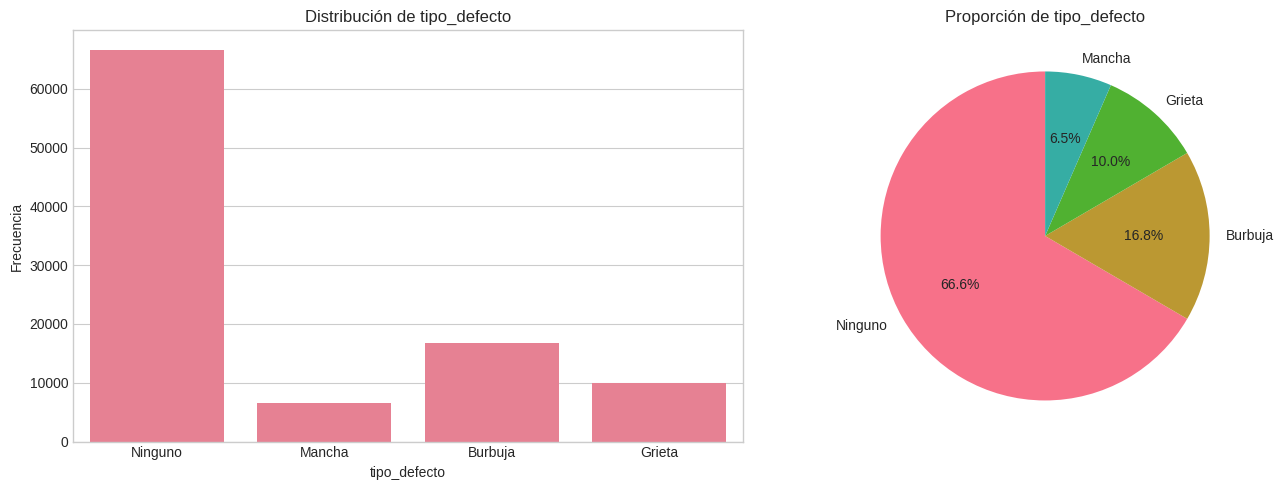


⚠️ ADVERTENCIA: Dataset desbalanceado (ratio 10.17:1)
   Considere técnicas de balanceo: SMOTE, undersampling, class weights


In [9]:
# =====================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO
# =====================================================

# COMPLETE: Especifique el nombre de su variable objetivo
TARGET_COLUMN = 'tipo_defecto'

print("=" * 60)
print(f"ANÁLISIS DE LA VARIABLE OBJETIVO: {TARGET_COLUMN}")
print("=" * 60)

# Para clasificación
if df[TARGET_COLUMN].dtype == 'object' or df[TARGET_COLUMN].nunique() < 20:
    print("\n📊 Distribución de clases:")
    class_dist = df[TARGET_COLUMN].value_counts()
    print(class_dist)

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de barras
    sns.countplot(data=df, x=TARGET_COLUMN, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')
    axes[0].set_xlabel(TARGET_COLUMN)
    axes[0].set_ylabel('Frecuencia')

    # Gráfico de pastel
    axes[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Proporción de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

    # Verificar desbalance
    imbalance_ratio = class_dist.max() / class_dist.min()
    if imbalance_ratio > 3:
        print(f"\n⚠️ ADVERTENCIA: Dataset desbalanceado (ratio {imbalance_ratio:.2f}:1)")
        print("   Considere técnicas de balanceo: SMOTE, undersampling, class weights")
else:
    # Para regresión
    print("\n📊 Estadísticas de la variable objetivo:")
    print(df[TARGET_COLUMN].describe())

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    sns.histplot(df[TARGET_COLUMN], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')

    # Box plot
    sns.boxplot(y=df[TARGET_COLUMN], ax=axes[1])
    axes[1].set_title(f'Box Plot de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

MATRIZ DE CORRELACIONES


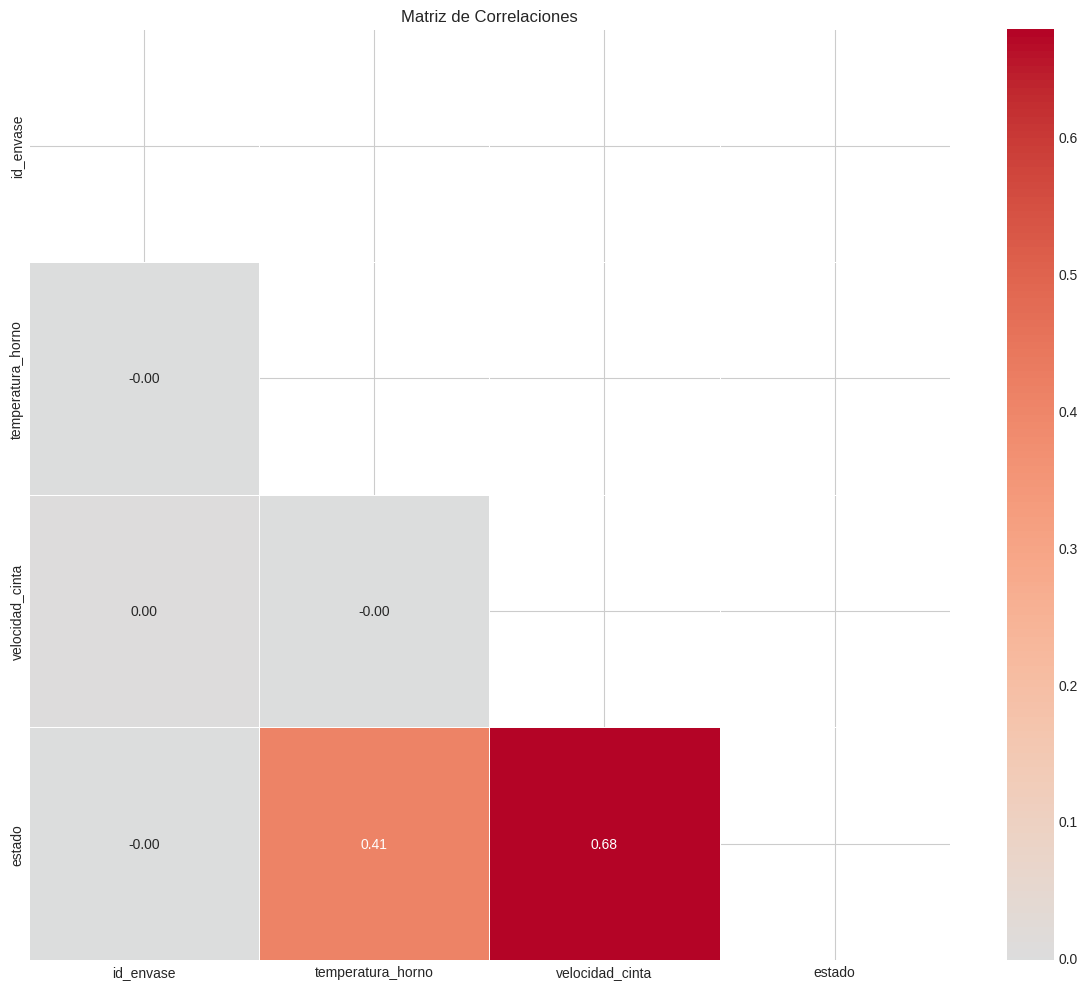

In [10]:
# =====================================================
# ANÁLISIS DE CORRELACIONES
# =====================================================

print("=" * 60)
print("MATRIZ DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Calcular correlaciones
    correlation_matrix = df[numeric_cols].corr()

    # Visualización
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    # Correlaciones con la variable objetivo
    if TARGET_COLUMN in numeric_cols:
        print(f"\n📊 Correlaciones con {TARGET_COLUMN}:")
        target_corr = correlation_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False)
        print(target_corr)
else:
    print("⚠️ No hay suficientes columnas numéricas para análisis de correlación")

VISUALIZACIONES ADICIONALES


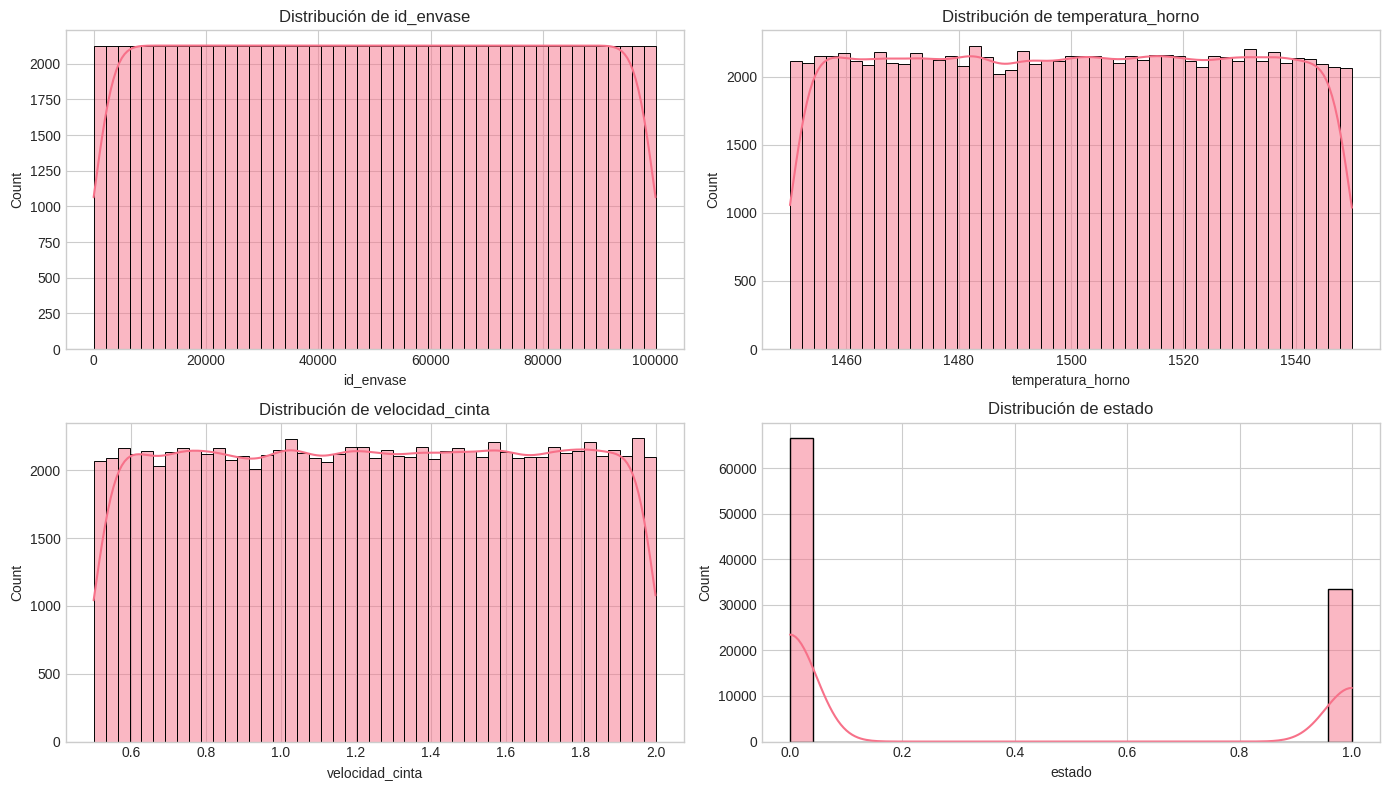

In [11]:
# =====================================================
# VISUALIZACIONES ADICIONALES
# =====================================================

print("=" * 60)
print("VISUALIZACIONES ADICIONALES")
print("=" * 60)

# Distribución de variables numéricas
numeric_cols_plot = df.select_dtypes(include=[np.number]).columns[:8]  # Primeras 8 columnas

if len(numeric_cols_plot) > 0:
    n_cols = 2
    n_rows = (len(numeric_cols_plot) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(numeric_cols_plot):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {col}')

    # Ocultar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

### 4.4 Hallazgos del EDA

**Instrucciones:** Resuma los principales hallazgos de la exploración de datos:

---

**Hallazgos Principales:**
1. Fuerte desbalance de clases: La variable objetivo tipo_defecto presenta un ratio de 10.17:1, donde la clase "Ninguno" (envases aptos) predomina ampliamente sobre las categorías de defectos (Burbuja, Grieta, Mancha).


2. Correlación de procesos: Según la lógica de generación de datos, existe una relación directa donde el incremento de la temperatura del horno y la velocidad de la cinta aumenta la probabilidad de generar un envase defectuoso.


3. Diversidad de productos: El dataset cubre correctamente la variabilidad de la producción de FAENVIPE, incluyendo envases para los rubros alimenticio, farmacéutico y de bebidas en tres colores distintos (Ámbar, Transparente, Verde).

**Problemas Identificados:**
1. Sesgo por desbalance: El ratio de 10.17:1 representa un riesgo alto de que el modelo se sesgue hacia la clase mayoritaria, ignorando los defectos críticos que comprometen la resistencia del envase.


2. Riesgo de Overfitting: Al tener pocos ejemplos de defectos específicos como "Mancha" o "Grieta" en comparación con los aptos, el modelo podría memorizar patrones de ruido en lugar de aprender las causas raíz del defecto.


3. Sensibilidad de métricas: La "Exactitud" no es una métrica confiable debido al desbalance; un modelo que prediga siempre "Apto" tendría un 90% de precisión pero fallaría totalmente en la detección de seguridad industrial.

**Acciones a Tomar:**
1. Balanceo de datos: Implementar técnicas de compensación como Class Weights (pesos de clase) en el algoritmo o SMOTE para generar ejemplos sintéticos de las clases minoritarias ('Burbuja', 'Grieta', 'Mancha').


2. Selección de métricas de éxito: Priorizar el uso de la Matriz de Confusión, Precision y Recall para asegurar que la tasa de detección de defectos reales aumente y se reduzca la merma en un 15%.

3. Ingeniería de variables: Evaluar si la interacción entre la temperatura y la velocidad (ej. temp * velocidad) aporta mayor poder predictivo al modelo que las variables por separado.

---

---
## 5. Preprocesamiento de Datos

### 5.1 Tratamiento de Valores Faltantes

In [22]:
# =====================================================
# TRATAMIENTO DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 60)

# Crear copia del dataframe
df_clean = df.copy()

# Opción 1: Eliminar filas con valores faltantes
# df_clean = df_clean.dropna()

# Opción 2: Imputar con la media (variables numéricas)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# Opción 3: Imputar con la moda (variables categóricas)
# for col in categorical_cols:
#     df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Opción 4: Imputación avanzada con KNN
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de imputación
# =====================================================
df_clean = df_clean.dropna()


print(f"\n✅ Valores faltantes tratados")
print(f"   Filas restantes: {len(df_clean):,}")

TRATAMIENTO DE VALORES FALTANTES

✅ Valores faltantes tratados
   Filas restantes: 100,000


### 5.2 Tratamiento de Outliers

In [23]:
# =====================================================
# DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# =====================================================

print("=" * 60)
print("DETECCIÓN DE OUTLIERS")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detectar outliers en cada columna numérica
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        outlier_summary.append({
            'Variable': col,
            'N_Outliers': n_outliers,
            'Porcentaje (%)': round(n_outliers/len(df_clean)*100, 2),
            'Límite_Inferior': round(lower, 2),
            'Límite_Superior': round(upper, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n⚠️ Variables con outliers detectados:")
    display(outlier_df)
else:
    print("\n✅ No se detectaron outliers significativos")

DETECCIÓN DE OUTLIERS

✅ No se detectaron outliers significativos


In [ ]:
# =====================================================
# TRATAMIENTO DE OUTLIERS (OPCIONAL)
# =====================================================

# Opción 1: Eliminar outliers
# for col in numeric_cols:
#     Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

# Opción 2: Capear outliers (winsorizing)
# from scipy.stats import mstats
# for col in numeric_cols:
#     df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])

# Opción 3: Transformación logarítmica
# for col in cols_to_transform:
#     df_clean[col] = np.log1p(df_clean[col])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de tratamiento
# =====================================================



### 5.3 Codificación de Variables Categóricas

In [26]:
# =====================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# =====================================================

print("=" * 60)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar variables categóricas
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nVariables categóricas encontradas: {categorical_cols}")

# Opción 1: Label Encoding (para variables ordinales o target)
# le = LabelEncoder()
# df_clean['columna_encoded'] = le.fit_transform(df_clean['columna'])

# Opción 2: One-Hot Encoding (para variables nominales)
# df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Opción 3: Target Encoding
# from sklearn.preprocessing import TargetEncoder
# encoder = TargetEncoder()
# df_clean[categorical_cols] = encoder.fit_transform(df_clean[categorical_cols], df_clean[TARGET_COLUMN])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de codificación
# =====================================================

df_clean = df_clean.drop(columns=['id_envase', 'estado'])


le = LabelEncoder()
df_clean['tipo_defecto'] = le.fit_transform(df_clean['tipo_defecto'])

target_classes = le.classes_

categorical_features = ['tipo_envase', 'color_vidrio']
df_clean = pd.get_dummies(df_clean, columns=categorical_features, drop_first=True)

print(f"\n✅ Codificación completada")
print(f"   Clases del target: {target_classes}")
print(f"   Dimensiones finales: {df_clean.shape}")
print(f"   Nuevas columnas: {df_clean.columns.tolist()}")

CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Variables categóricas encontradas: ['tipo_envase', 'color_vidrio', 'tipo_defecto']

✅ Codificación completada
   Clases del target: ['Burbuja' 'Grieta' 'Mancha' 'Ninguno']
   Dimensiones finales: (100000, 7)
   Nuevas columnas: ['temperatura_horno', 'velocidad_cinta', 'tipo_defecto', 'tipo_envase_Jarabe', 'tipo_envase_Mermelada', 'color_vidrio_Transparente', 'color_vidrio_Verde']


### 5.4 Escalado/Normalización de Features

In [27]:
# =====================================================
# ESCALADO DE FEATURES
# =====================================================

print("=" * 60)
print("ESCALADO DE FEATURES")
print("=" * 60)

# Separar features y target
X = df_clean.drop(columns=[TARGET_COLUMN])
y = df_clean[TARGET_COLUMN]

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Opción 1: StandardScaler (media=0, std=1) - Recomendado para redes neuronales
scaler = StandardScaler()

# Opción 2: MinMaxScaler (rango [0,1])
# scaler = MinMaxScaler()

# Opción 3: RobustScaler (robusto a outliers)
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

# Aplicar escalado
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\n✅ Escalado completado usando {type(scaler).__name__}")
print(f"   Media de features: {X_scaled.mean().mean():.6f}")
print(f"   Std de features: {X_scaled.std().mean():.6f}")

ESCALADO DE FEATURES

Dimensiones de X: (100000, 6)
Dimensiones de y: (100000,)

✅ Escalado completado usando StandardScaler
   Media de features: 0.000000
   Std de features: 1.000005


### 5.5 División de Datos (Train/Validation/Test)

In [28]:
# =====================================================
# DIVISIÓN DE DATOS
# =====================================================

print("=" * 60)
print("DIVISIÓN DE DATOS")
print("=" * 60)

# División en train (70%), validation (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=RANDOM_SEED, stratify=y if y.dtype == 'object' or y.nunique() < 20 else None
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=RANDOM_SEED, stratify=y_temp if y_temp.dtype == 'object' or y_temp.nunique() < 20 else None  # 0.176 ≈ 15% del total
)

print(f"\n📊 División de datos:")
print(f"   Training set:   {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Validation set: {X_val.shape[0]:,} muestras ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

# Verificar distribución de clases (para clasificación)
if y.dtype == 'object' or y.nunique() < 20:
    print(f"\n📊 Distribución de clases en cada conjunto:")
    print(f"   Train: {dict(y_train.value_counts(normalize=True).round(3))}")
    print(f"   Val:   {dict(y_val.value_counts(normalize=True).round(3))}")
    print(f"   Test:  {dict(y_test.value_counts(normalize=True).round(3))}")

DIVISIÓN DE DATOS

📊 División de datos:
   Training set:   70,040 muestras (70.0%)
   Validation set: 14,960 muestras (15.0%)
   Test set:       15,000 muestras (15.0%)

📊 Distribución de clases en cada conjunto:
   Train: {3: np.float64(0.666), 0: np.float64(0.168), 1: np.float64(0.1), 2: np.float64(0.065)}
   Val:   {3: np.float64(0.666), 0: np.float64(0.168), 1: np.float64(0.1), 2: np.float64(0.065)}
   Test:  {3: np.float64(0.666), 0: np.float64(0.168), 1: np.float64(0.1), 2: np.float64(0.065)}


### 5.6 Preparación de Datos para Deep Learning

In [29]:
# =====================================================
# PREPARACIÓN PARA PYTORCH
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA PYTORCH")
print("=" * 60)

# Convertir a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
X_test_tensor = torch.FloatTensor(X_test.values)

# Para clasificación
if y.dtype == 'object' or y.nunique() < 20:
    # Codificar labels si es necesario
    if y_train.dtype == 'object':
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_val_encoded = label_encoder.transform(y_val)
        y_test_encoded = label_encoder.transform(y_test)
    else:
        y_train_encoded = y_train.values
        y_val_encoded = y_val.values
        y_test_encoded = y_test.values

    y_train_tensor = torch.LongTensor(y_train_encoded)
    y_val_tensor = torch.LongTensor(y_val_encoded)
    y_test_tensor = torch.LongTensor(y_test_encoded)
else:
    # Para regresión
    y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
    y_val_tensor = torch.FloatTensor(y_val.values).unsqueeze(1)
    y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

# Crear DataLoaders
BATCH_SIZE = 32  # Ajuste según su dataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"\n✅ DataLoaders creados")
print(f"   Batch size: {BATCH_SIZE}")
print(f"   Batches de entrenamiento: {len(train_loader)}")
print(f"   Batches de validación: {len(val_loader)}")
print(f"   Batches de test: {len(test_loader)}")

PREPARACIÓN DE DATOS PARA PYTORCH

✅ DataLoaders creados
   Batch size: 32
   Batches de entrenamiento: 2189
   Batches de validación: 468
   Batches de test: 469


In [30]:
# =====================================================
# PREPARACIÓN PARA TENSORFLOW/KERAS (ALTERNATIVA)
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS")
print("=" * 60)

# Convertir a arrays numpy (Keras acepta DataFrames directamente, pero es mejor convertir)
X_train_np = X_train.values.astype('float32')
X_val_np = X_val.values.astype('float32')
X_test_np = X_test.values.astype('float32')

# Para clasificación: One-hot encoding del target
if y.dtype == 'object' or y.nunique() < 20:
    num_classes = y.nunique()
    y_train_np = keras.utils.to_categorical(y_train_encoded, num_classes)
    y_val_np = keras.utils.to_categorical(y_val_encoded, num_classes)
    y_test_np = keras.utils.to_categorical(y_test_encoded, num_classes)
else:
    y_train_np = y_train.values.astype('float32')
    y_val_np = y_val.values.astype('float32')
    y_test_np = y_test.values.astype('float32')

print(f"\n✅ Datos preparados para TensorFlow/Keras")
print(f"   Shape X_train: {X_train_np.shape}")
print(f"   Shape y_train: {y_train_np.shape}")

PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS

✅ Datos preparados para TensorFlow/Keras
   Shape X_train: (70040, 6)
   Shape y_train: (70040, 4)


---
## 6. Diseño y Arquitectura del Modelo

### 6.1 Justificación de la Arquitectura

**Instrucciones:** Justifique la elección de su arquitectura de red neuronal:
- ¿Por qué eligió este tipo de arquitectura?
- ¿Qué alternativas consideró?
- ¿Cómo determinó el número de capas y neuronas?

---

*[Escriba su justificación aquí]*



---

### 6.2 Definición del Modelo

In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON PYTORCH
# =====================================================

class NeuralNetwork(nn.Module):
    """
    Red Neuronal para [Clasificación/Regresión]

    Arquitectura:
    - Capa de entrada: [n_features] neuronas
    - Capas ocultas: [Describir]
    - Capa de salida: [n_outputs] neuronas
    """

    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.3):
        super(NeuralNetwork, self).__init__()

        layers = []
        prev_size = input_size

        # Capas ocultas
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size

        # Capa de salida
        layers.append(nn.Linear(prev_size, output_size))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# =====================================================
# CONFIGURACIÓN DEL MODELO
# =====================================================

INPUT_SIZE = X_train.shape[1]
HIDDEN_SIZES = [128, 64, 32]  # Ajuste según su problema
OUTPUT_SIZE = y.nunique() if (y.dtype == 'object' or y.nunique() < 20) else 1
DROPOUT_RATE = 0.3

# Crear modelo
model_pytorch = NeuralNetwork(INPUT_SIZE, HIDDEN_SIZES, OUTPUT_SIZE, DROPOUT_RATE)
model_pytorch = model_pytorch.to(device)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (PyTorch)")
print("=" * 60)
print(model_pytorch)

# Contar parámetros
total_params = sum(p.numel() for p in model_pytorch.parameters())
trainable_params = sum(p.numel() for p in model_pytorch.parameters() if p.requires_grad)
print(f"\n📊 Parámetros totales: {total_params:,}")
print(f"   Parámetros entrenables: {trainable_params:,}")

In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON KERAS (ALTERNATIVA)
# =====================================================

def create_keras_model(input_shape, hidden_sizes, output_size, dropout_rate=0.3, task='classification'):
    """
    Crea un modelo de red neuronal con Keras.

    Args:
        input_shape: Dimensión de entrada
        hidden_sizes: Lista con el número de neuronas por capa oculta
        output_size: Número de neuronas de salida
        dropout_rate: Tasa de dropout
        task: 'classification' o 'regression'
    """
    model = keras.Sequential()

    # Capa de entrada
    model.add(layers.Input(shape=(input_shape,)))

    # Capas ocultas
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(dropout_rate))

    # Capa de salida
    if task == 'classification':
        if output_size == 2:
            model.add(layers.Dense(1, activation='sigmoid'))
        else:
            model.add(layers.Dense(output_size, activation='softmax'))
    else:
        model.add(layers.Dense(1, activation='linear'))

    return model

# Crear modelo Keras
TASK = 'classification'  # Cambie a 'regression' si es necesario

model_keras = create_keras_model(
    input_shape=INPUT_SIZE,
    hidden_sizes=HIDDEN_SIZES,
    output_size=OUTPUT_SIZE,
    dropout_rate=DROPOUT_RATE,
    task=TASK
)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (Keras)")
print("=" * 60)
model_keras.summary()

### 6.3 Diagrama de la Arquitectura

**Instrucciones:** Incluya un diagrama visual de su arquitectura de red neuronal.

---

*[Inserte diagrama o descripción visual de la arquitectura]*

```
Input Layer          Hidden Layer 1       Hidden Layer 2       Output Layer
[n features]   -->   [128 neurons]   -->  [64 neurons]    -->  [n classes]
                     + BatchNorm          + BatchNorm
                     + ReLU               + ReLU
                     + Dropout(0.3)       + Dropout(0.3)
```

---

---
## 7. Entrenamiento del Modelo

### 7.1 Configuración del Entrenamiento

In [ ]:
# =====================================================
# HIPERPARÁMETROS DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CONFIGURACIÓN DEL ENTRENAMIENTO")
print("=" * 60)

# Hiperparámetros
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 32
EARLY_STOPPING_PATIENCE = 10

print(f"\n📋 Hiperparámetros:")
print(f"   Learning Rate: {LEARNING_RATE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")

In [ ]:
# =====================================================
# CONFIGURACIÓN DE LOSS Y OPTIMIZADOR (PyTorch)
# =====================================================

# Seleccionar función de pérdida según el tipo de problema
if y.dtype == 'object' or y.nunique() < 20:
    # Clasificación
    criterion = nn.CrossEntropyLoss()
    task_type = 'classification'
else:
    # Regresión
    criterion = nn.MSELoss()
    task_type = 'regression'

# Optimizador
optimizer = optim.Adam(model_pytorch.parameters(), lr=LEARNING_RATE)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

print(f"\n📋 Configuración:")
print(f"   Tipo de problema: {task_type}")
print(f"   Función de pérdida: {criterion}")
print(f"   Optimizador: Adam")
print(f"   Scheduler: ReduceLROnPlateau")

### 7.2 Entrenamiento del Modelo (PyTorch)

In [ ]:
# =====================================================
# FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN
# =====================================================

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Entrena el modelo por una época."""
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if task_type == 'classification':
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total if task_type == 'classification' else None

    return avg_loss, accuracy

def evaluate(model, val_loader, criterion, device):
    """Evalúa el modelo en el conjunto de validación."""
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()

            if task_type == 'classification':
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total if task_type == 'classification' else None

    return avg_loss, accuracy

In [ ]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (PyTorch)
# =====================================================

print("=" * 60)
print("ENTRENAMIENTO DEL MODELO")
print("=" * 60)

# Historial de entrenamiento
history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}

# Early stopping
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

print(f"\n🚀 Iniciando entrenamiento...\n")

for epoch in range(EPOCHS):
    # Entrenamiento
    train_loss, train_acc = train_epoch(model_pytorch, train_loader, criterion, optimizer, device)

    # Validación
    val_loss, val_acc = evaluate(model_pytorch, val_loader, criterion, device)

    # Guardar historial
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    if task_type == 'classification':
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # Scheduler step
    scheduler.step(val_loss)

    # Imprimir progreso cada 10 épocas
    if (epoch + 1) % 10 == 0 or epoch == 0:
        if task_type == 'classification':
            print(f"Época {epoch+1:3d}/{EPOCHS} | "
                  f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
                  f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        else:
            print(f"Época {epoch+1:3d}/{EPOCHS} | "
                  f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model_pytorch.state_dict().copy()
    else:
        patience_counter += 1
        if patience_counter >= EARLY_STOPPING_PATIENCE:
            print(f"\n⚠️ Early stopping en época {epoch+1}")
            break

# Cargar mejor modelo
if best_model_state is not None:
    model_pytorch.load_state_dict(best_model_state)
    print(f"\n✅ Mejor modelo cargado (Val Loss: {best_val_loss:.4f})")

print(f"\n🎉 Entrenamiento completado!")

### 7.3 Entrenamiento del Modelo (Keras - Alternativa)

In [ ]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (KERAS)
# =====================================================

# Compilar modelo
if TASK == 'classification':
    if OUTPUT_SIZE == 2:
        model_keras.compile(
            optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    else:
        model_keras.compile(
            optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
else:
    model_keras.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='mse',
        metrics=['mae']
    )

# Callbacks
keras_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1
    ),
    callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )
]

# Entrenar
print("=" * 60)
print("ENTRENAMIENTO DEL MODELO (KERAS)")
print("=" * 60)

history_keras = model_keras.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=keras_callbacks,
    verbose=1
)

print("\n🎉 Entrenamiento completado!")

### 7.4 Visualización del Entrenamiento

In [ ]:
# =====================================================
# VISUALIZACIÓN DEL PROCESO DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CURVAS DE APRENDIZAJE")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de pérdida
axes[0].plot(history['train_loss'], label='Train Loss', linewidth=2)
axes[0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Evolución de la Pérdida', fontsize=14)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico de precisión (solo para clasificación)
if task_type == 'classification':
    axes[1].plot(history['train_acc'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history['val_acc'], label='Validation Accuracy', linewidth=2)
    axes[1].set_title('Evolución de la Precisión', fontsize=14)
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'N/A para Regresión', ha='center', va='center', fontsize=14)
    axes[1].set_title('Precisión (No aplica)')

plt.tight_layout()
plt.show()

# Análisis del entrenamiento
print("\n📊 Análisis del Entrenamiento:")
print(f"   Épocas completadas: {len(history['train_loss'])}")
print(f"   Mejor val_loss: {min(history['val_loss']):.4f} (época {history['val_loss'].index(min(history['val_loss']))+1})")
if task_type == 'classification':
    print(f"   Mejor val_acc: {max(history['val_acc']):.4f} (época {history['val_acc'].index(max(history['val_acc']))+1})")

---
## 8. Evaluación y Métricas

### 8.1 Evaluación en el Conjunto de Test

In [ ]:
# =====================================================
# EVALUACIÓN EN EL CONJUNTO DE TEST
# =====================================================

print("=" * 60)
print("EVALUACIÓN EN CONJUNTO DE TEST")
print("=" * 60)

# Hacer predicciones
model_pytorch.eval()
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    outputs = model_pytorch(X_test_device)

    if task_type == 'classification':
        _, y_pred = torch.max(outputs, 1)
        y_pred = y_pred.cpu().numpy()
        y_true = y_test_tensor.numpy()
        y_proba = torch.softmax(outputs, dim=1).cpu().numpy()
    else:
        y_pred = outputs.cpu().numpy().flatten()
        y_true = y_test_tensor.numpy().flatten()

print(f"\n✅ Predicciones realizadas: {len(y_pred)} muestras")

In [ ]:
# =====================================================
# MÉTRICAS DE CLASIFICACIÓN
# =====================================================

if task_type == 'classification':
    print("=" * 60)
    print("MÉTRICAS DE CLASIFICACIÓN")
    print("=" * 60)

    # Calcular métricas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n📊 Métricas Principales:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")

    # Reporte de clasificación completo
    print(f"\n📋 Reporte de Clasificación Detallado:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(OUTPUT_SIZE),
                yticklabels=range(OUTPUT_SIZE))
    plt.title('Matriz de Confusión', fontsize=14)
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()

In [ ]:
# =====================================================
# MÉTRICAS DE REGRESIÓN
# =====================================================

if task_type == 'regression':
    print("=" * 60)
    print("MÉTRICAS DE REGRESIÓN")
    print("=" * 60)

    # Calcular métricas
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 Métricas de Regresión:")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   R²:   {r2:.4f}")

    # Gráfico de predicciones vs valores reales
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter plot
    axes[0].scatter(y_true, y_pred, alpha=0.5)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0].set_xlabel('Valor Real')
    axes[0].set_ylabel('Predicción')
    axes[0].set_title('Predicciones vs Valores Reales')

    # Distribución de residuos
    residuos = y_true - y_pred
    axes[1].hist(residuos, bins=50, edgecolor='black')
    axes[1].axvline(x=0, color='r', linestyle='--')
    axes[1].set_xlabel('Residuo')
    axes[1].set_ylabel('Frecuencia')
    axes[1].set_title('Distribución de Residuos')

    plt.tight_layout()
    plt.show()

### 8.2 Comparación con Modelo Baseline

In [ ]:
# =====================================================
# COMPARACIÓN CON MODELO BASELINE
# =====================================================

print("=" * 60)
print("COMPARACIÓN CON MODELO BASELINE")
print("=" * 60)

if task_type == 'classification':
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression

    # Modelos baseline
    baselines = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
    }
else:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import LinearRegression

    baselines = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)
    }

# Entrenar y evaluar baselines
results = {'Modelo': [], 'Métrica': []}

for name, model in baselines.items():
    model.fit(X_train, y_train)
    y_pred_baseline = model.predict(X_test)

    if task_type == 'classification':
        metric = accuracy_score(y_test, y_pred_baseline)
        metric_name = 'Accuracy'
    else:
        metric = r2_score(y_test, y_pred_baseline)
        metric_name = 'R²'

    results['Modelo'].append(name)
    results['Métrica'].append(metric)

# Agregar modelo de Deep Learning
results['Modelo'].append('Deep Learning')
if task_type == 'classification':
    results['Métrica'].append(accuracy)
else:
    results['Métrica'].append(r2)

# Mostrar comparación
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values('Métrica', ascending=False)

print(f"\n📊 Comparación de Modelos ({metric_name}):")
display(comparison_df)

# Visualización
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if m == 'Deep Learning' else '#3498db' for m in comparison_df['Modelo']]
plt.barh(comparison_df['Modelo'], comparison_df['Métrica'], color=colors)
plt.xlabel(metric_name)
plt.title(f'Comparación de Modelos - {metric_name}')
plt.tight_layout()
plt.show()

### 8.3 Análisis de Resultados

**Instrucciones:** Analice los resultados obtenidos:

---

**Rendimiento del Modelo:**
*[Analice las métricas obtenidas]*

**Comparación con Baselines:**
*[Compare el rendimiento con los modelos baseline]*

**Fortalezas del Modelo:**
1. *[Completar]*
2. *[Completar]*

**Debilidades del Modelo:**
1. *[Completar]*
2. *[Completar]*

**Posibles Mejoras:**
1. *[Completar]*
2. *[Completar]*

---

---
## 9. Interpretación de Resultados

### 9.1 Importancia de Features (SHAP)

In [ ]:
# =====================================================
# INTERPRETABILIDAD CON SHAP (OPCIONAL)
# =====================================================

# Instalar SHAP si no está disponible
# !pip install shap

try:
    import shap

    print("=" * 60)
    print("ANÁLISIS DE IMPORTANCIA DE FEATURES (SHAP)")
    print("=" * 60)

    # Crear explainer
    # Usar una muestra del dataset para acelerar el cálculo
    sample_size = min(100, len(X_test))
    X_sample = X_test.iloc[:sample_size]

    # Para modelos de sklearn (baselines)
    explainer = shap.TreeExplainer(baselines['Random Forest'])
    shap_values = explainer.shap_values(X_sample)

    # Visualización
    plt.figure(figsize=(12, 8))
    if task_type == 'classification' and len(shap_values) > 1:
        shap.summary_plot(shap_values[1], X_sample, plot_type="bar", show=False)
    else:
        shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
    plt.title('Importancia de Features (SHAP)')
    plt.tight_layout()
    plt.show()

except ImportError:
    print("⚠️ SHAP no está instalado. Ejecute: !pip install shap")
except Exception as e:
    print(f"⚠️ Error en análisis SHAP: {e}")

### 9.2 Interpretación de Negocios

**Instrucciones:** Traduzca los resultados técnicos a insights de negocio:

---

**Insights Principales:**
1. *[Insight 1 - ¿Qué significa el resultado para el negocio?]*
2. *[Insight 2]*
3. *[Insight 3]*

**Factores Más Importantes:**
*[¿Cuáles son los factores más importantes según el modelo y qué significan para el negocio?]*

**Patrones Identificados:**
*[¿Qué patrones ha identificado el modelo que pueden ser relevantes para la toma de decisiones?]*

---

---
## 10. Conclusiones y Recomendaciones de Negocio

### 10.1 Resumen de Resultados

**Instrucciones:** Proporcione un resumen ejecutivo de los resultados:

---

*[Resuma los principales resultados del proyecto en 2-3 párrafos]*

---

### 10.2 Conclusiones

**Instrucciones:** Liste las conclusiones principales:

---

1. *[Conclusión 1]*
2. *[Conclusión 2]*
3. *[Conclusión 3]*
4. *[Conclusión 4]*

---

### 10.3 Recomendaciones de Negocio

**Instrucciones:** Proporcione recomendaciones accionables basadas en los resultados:

---

**Recomendaciones a Corto Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

**Recomendaciones a Mediano Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

**Recomendaciones a Largo Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

---

### 10.4 Limitaciones del Estudio

**Instrucciones:** Identifique las limitaciones de su análisis:

---

1. *[Limitación 1]*
2. *[Limitación 2]*
3. *[Limitación 3]*

---

### 10.5 Trabajo Futuro

**Instrucciones:** Proponga líneas de investigación futura:

---

1. *[Propuesta 1]*
2. *[Propuesta 2]*
3. *[Propuesta 3]*

---

---
## 11. Referencias

**Instrucciones:** Liste todas las referencias utilizadas (formato APA):

---

1. *[Referencia 1]*
2. *[Referencia 2]*
3. *[Referencia 3]*

---

---
## Anexos

### A. Guardado del Modelo

In [ ]:
# =====================================================
# GUARDAR EL MODELO ENTRENADO
# =====================================================

print("=" * 60)
print("GUARDADO DEL MODELO")
print("=" * 60)

# Guardar modelo PyTorch
MODEL_PATH = 'modelo_final.pth'
torch.save({
    'model_state_dict': model_pytorch.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': history,
    'hyperparameters': {
        'input_size': INPUT_SIZE,
        'hidden_sizes': HIDDEN_SIZES,
        'output_size': OUTPUT_SIZE,
        'dropout_rate': DROPOUT_RATE,
        'learning_rate': LEARNING_RATE
    }
}, MODEL_PATH)

print(f"\n✅ Modelo PyTorch guardado en: {MODEL_PATH}")

# Guardar modelo Keras (opcional)
# model_keras.save('modelo_final.keras')
# print(f"✅ Modelo Keras guardado en: modelo_final.keras")

# Guardar scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')
print(f"✅ Scaler guardado en: scaler.pkl")

### B. Cargar Modelo Guardado (para Inferencia)

In [ ]:
# =====================================================
# CARGAR MODELO PARA INFERENCIA
# =====================================================

def load_model_and_predict(model_path, scaler_path, new_data):
    """
    Carga el modelo entrenado y hace predicciones sobre nuevos datos.

    Args:
        model_path: Ruta al archivo del modelo
        scaler_path: Ruta al archivo del scaler
        new_data: DataFrame con los nuevos datos

    Returns:
        Predicciones
    """
    # Cargar checkpoint
    checkpoint = torch.load(model_path, map_location=device)

    # Reconstruir modelo
    hp = checkpoint['hyperparameters']
    model = NeuralNetwork(
        hp['input_size'],
        hp['hidden_sizes'],
        hp['output_size'],
        hp['dropout_rate']
    )
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval()

    # Cargar scaler
    scaler = joblib.load(scaler_path)

    # Preprocesar datos
    new_data_scaled = scaler.transform(new_data)
    new_data_tensor = torch.FloatTensor(new_data_scaled).to(device)

    # Hacer predicción
    with torch.no_grad():
        outputs = model(new_data_tensor)
        if task_type == 'classification':
            _, predictions = torch.max(outputs, 1)
            predictions = predictions.cpu().numpy()
        else:
            predictions = outputs.cpu().numpy().flatten()

    return predictions

# Ejemplo de uso:
# predictions = load_model_and_predict('modelo_final.pth', 'scaler.pkl', new_df)
print("✅ Función de carga e inferencia definida")

---

## Checklist de Entrega

Antes de entregar, verifique que ha completado los siguientes elementos:

- [ ] Información del proyecto completada
- [ ] Resumen ejecutivo escrito
- [ ] Problema de negocio claramente definido
- [ ] Objetivos SMART establecidos
- [ ] EDA completo con visualizaciones
- [ ] Preprocesamiento de datos documentado
- [ ] Arquitectura del modelo justificada
- [ ] Modelo entrenado con curvas de aprendizaje
- [ ] Métricas de evaluación calculadas
- [ ] Comparación con modelos baseline
- [ ] Interpretación de resultados
- [ ] Conclusiones y recomendaciones de negocio
- [ ] Referencias listadas
- [ ] Código ejecutable sin errores
- [ ] Comentarios y documentación adecuados

---

**¡Buena suerte con su proyecto!** 🎓